In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

In [2]:
warnings.filterwarnings(action="ignore",module="scipy",message="^internal gelsd")

In [3]:
house_df=pd.read_csv("sample.csv")

In [4]:
house_df.head()

,id,sqft_living,price
0,0,1180,221900.0
1,1,2570,538000.0
2,2,770,180000.0
3,3,1960,604000.0
4,4,1680,510000.0


In [5]:
house_df.isnull().any()

id             False
sqft_living    False
price           True
dtype: bool

In [6]:
house_df.drop("id",inplace=True,axis=1)

In [7]:
house_df.drop([1781],inplace=True)

In [8]:
X=house_df.iloc[:,:1].values

In [9]:
Y=house_df.iloc[:,-1].values

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=5)

In [11]:
simple_lr=LinearRegression()
simple_lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
Y_pred=simple_lr.predict(X_test)

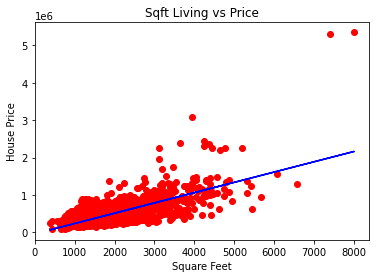

In [13]:
import numpy as np
plt.scatter(X_train,Y_train,color="r")
plt.title("Sqft Living vs Price")
plt.xlabel("Square Feet")
plt.ylabel("House Price")
plt.plot(X_train,simple_lr.predict(X_train),color="b")
plt.show()

In [14]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1781 entries, 0 to 1780
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sqft_living  1781 non-null   int64  
 1   price        1781 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 41.7 KB


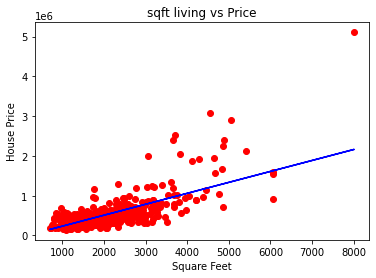

In [16]:
plt.scatter(X_test,Y_test,color="r")
plt.plot(X_test,Y_pred,color="b")
plt.title("sqft living vs Price")
plt.xlabel("Square Feet")
plt.ylabel("House Price")
plt.show()

In [17]:
from sklearn.metrics import mean_squared_error

In [18]:
from math import sqrt

In [21]:
rmse=sqrt(mean_squared_error(Y_test,Y_pred))
from sklearn.metrics import r2_score
r2=r2_score(Y_test,Y_pred)
adjusted_r2=(1-r2)*(len(Y)-1)/(len(Y)-len(simple_lr.coef_-1))
rmse, r2, adjusted_r2, simple_lr.coef_, simple_lr.intercept_

(306244.95684552076,
 0.5214894571770117,
 0.4785105428229883,
 array([275.47171976]),
 -41422.75233411533)

In [22]:
import numpy as np
x_unseen=np.array([1500]).reshape(1,1)
simple_lr.predict(x_unseen)

array([371784.82730603])